In [75]:
import pandas as pd
import numpy as np
import re

In [76]:
##reading the csv file
data=pd.read_csv("/content/drive/MyDrive/keyword.csv")
data.head()

,keyword,sv,date
0,02 night marine lip gloss,10,2021-11-30
1,02 night marine lip gloss,20,2021-10-31
2,02 night marine lip gloss,10,2021-09-30
3,02 night marine lip gloss,20,2021-08-31
4,02 night marine lip gloss,0,2019-07-31


In [77]:
##basic data preprocessing

In [78]:
data.shape

(325056, 3)

In [79]:
data["keyword"].value_counts()

genderless beauty products        188
genderless cosmetics              188
genderless makeup                 188
genderless makeup brands          188
sephora plumping lip gloss        142
                                 ... 
cinnamon and sugar lip plumper     47
non gloss lip plumper              47
non injection lip plumper          47
non invasive lip plumper           47
city lips price                    47
Name: keyword, Length: 6324, dtype: int64

In [80]:
data.drop_duplicates(inplace=True)
data.shape

(305622, 3)

In [81]:
data["keyword"].value_counts()

sephora buxom lip gloss                        91
pillow plump lip gloss                         89
hard candy plumping serum lip gloss            89
bareminerals maverick lip gloss                89
two faced lip injection lip gloss              88
                                               ..
ministar lip plumper amazon                    47
ministar lip plumper comfort oil               47
ministar lip plumper super volume              47
ministar professional makeup lip extreme 3d    47
mother pukka lip gloss                         47
Name: keyword, Length: 6324, dtype: int64

In [82]:
data.columns

Index(['keyword', 'sv', 'date'], dtype='object')

In [83]:
data = data.groupby(['keyword','date'], as_index=False)['sv'].sum()
data.shape

(301100, 3)

In [84]:
data["keyword"].value_counts()

$1 lip gloss                          48
lip gloss shine                       48
lip gloss tiktok                      48
lip gloss that tastes good            48
lip gloss that stays on               48
                                      ..
iconic london plumping lip gloss      47
iconic london peek a boo lip gloss    47
natural at home lip plumper           47
iconic london nearly nude lipgloss    47
chilli lip plumper                    47
Name: keyword, Length: 6324, dtype: int64

In [85]:
##clustering usig count vectorizer instead of tfidf vectorizer

In [86]:
corpus=data['keyword'].values

In [87]:
corpus

array(['$1 lip gloss', '$1 lip gloss', '$1 lip gloss', ...,
       'zoeva lip gloss', 'zoeva lip gloss', 'zoeva lip gloss'],
      dtype=object)

In [88]:
##cleaning the corpus removing the digit for making raw data for count vectorizer
#corpus=list(map(lambda x: re.sub(r'[0-9]+',' ',x).strip(),corpus))

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# vectorizer = TfidfVectorizer(ngram_range=(1,3))
# X = vectorizer.fit_transform(corpus)


##using count vectorizer instead to tfidf
vectorizer_ = CountVectorizer(ngram_range=(1,3))
X_= vectorizer_.fit_transform(corpus)

In [90]:
vectorizer_.get_feature_names_out()

array(['001', '001 lip', '001 lip gloss', ..., 'zoeva', 'zoeva lip',
       'zoeva lip gloss'], dtype=object)

In [91]:
X_.shape

(301100, 15956)

In [70]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from tqdm import tqdm




In [ ]:
K=[20,50,100,150,200]
wcss = []
 
for k in tqdm(K):
    # Building and fitting the model
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_) 
    wcss.append(kmeans.inertia_)

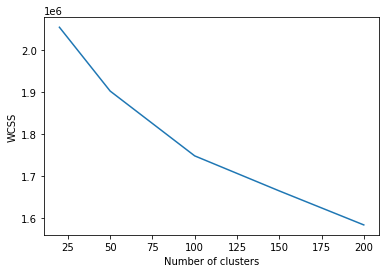

In [43]:
plt.plot(K, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [92]:
kmeans = KMeans(n_clusters = 100, init = "k-means++")
y_kmeans = kmeans.fit_predict(X_)

In [95]:
data["clusters"]=list(y_kmeans)

In [96]:
data.head()

,keyword,date,sv,clusters
0,$1 lip gloss,2017-12-31,260,2
1,$1 lip gloss,2018-01-31,170,2
2,$1 lip gloss,2018-02-28,170,2
3,$1 lip gloss,2018-03-31,140,2
4,$1 lip gloss,2018-04-30,110,2


In [97]:
data.to_csv("/content/drive/MyDrive/clustered.csv",index=None)
# data=pd.read_csv("/content/drive/MyDrive/clustered.csv")

In [98]:
data[data["keyword"]=="genderless beauty products"]

,keyword,date,sv,clusters
121529,genderless beauty products,2017-12-31,0,11
121530,genderless beauty products,2018-01-31,0,11
121531,genderless beauty products,2018-02-28,0,11
121532,genderless beauty products,2018-03-31,0,11
121533,genderless beauty products,2018-04-30,0,11
121534,genderless beauty products,2018-05-31,0,11
121535,genderless beauty products,2018-06-30,0,11
121536,genderless beauty products,2018-07-31,0,11
121537,genderless beauty products,2018-08-31,0,11
121538,genderless beauty products,2018-09-30,0,11


In [ ]:
##for changing the dataframe

In [99]:
data=data[data["date"]<='2021-08-31']

In [100]:
unique_entity=data["keyword"].unique()
unique_date=data["date"].unique()
unique_sv=data["sv"].unique()
unique_clusters=data["clusters"].unique()
unique_entity.sort()
unique_date.sort()
unique_sv.sort()
unique_clusters.sort()

In [101]:
unique_date

array(['2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
       '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
       '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
       '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
       '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
       '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
       '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
       '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
       '2021-08-31'], dtype=object)

In [102]:
##cluster dict  with corresponding clusters
cluster_dict={}
for item in unique_entity:
  df=data[data["keyword"]==item]["clusters"].values
  cluster_dict.update({item:df[0]})

print(len(cluster_dict))

6324


In [104]:
##print cluster:
def show_cluster(n):
  for i in cluster_dict:
    if cluster_dict[i]==n:
      print(i)
show_cluster(1)

best lip gloss
best lip gloss 2020
best lip gloss 2021
best lip gloss at ulta
best lip gloss brand
best lip gloss for aging lips
best lip gloss for bigger lips
best lip gloss for brown skin
best lip gloss for dark lips
best lip gloss for dark skin
best lip gloss for dry lips
best lip gloss for indian skin
best lip gloss for lip fillers
best lip gloss for plump lips
best lip gloss for sensitive lips
best lip gloss in the world
best lip gloss on amazon
best lip gloss plumper 2020
best lip gloss reddit
best lip gloss sephora
best lip gloss to make lips bigger
best lip gloss ulta
the best lip gloss


In [105]:
##date_item_sv. dict_creation
date_sv_dict={}

for item in tqdm(unique_entity):
  temp_dict={}
  df=data[data["keyword"]==item]
  for i,j in zip(df["date"],df["sv"]):
    temp_dict.update({i:j})
  date_sv_dict.update({item:temp_dict})




100%|██████████| 6324/6324 [01:56<00:00, 54.22it/s]


In [106]:
date_sv_dict;

In [107]:
len(date_sv_dict)

6324

In [108]:
##initialing clustering merging file for data

clusters_data_dict={}
for cluster_no in unique_clusters:
  temp={}
  for date in unique_date:
    temp.update({date:0})
  clusters_data_dict.update({cluster_no:temp})
len(clusters_data_dict)

100

In [109]:
## updating cluster clusters_data_dict
for cluster_no in unique_clusters:
  df=data[data["clusters"]==cluster_no]
  for date,sv in zip(df["date"],df["sv"]):
    # clusters_data_dict[cluster_no][date]+=sv
    clusters_data_dict[cluster_no][date]=(clusters_data_dict[cluster_no][date]+sv)//2






In [110]:
unique_date

array(['2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
       '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
       '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
       '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
       '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
       '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
       '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
       '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
       '2021-08-31'], dtype=object)

In [31]:
# for cluster_no in unique_clusters:
#   if '2021-11-30' in clusters_data_dict[cluster_no]:



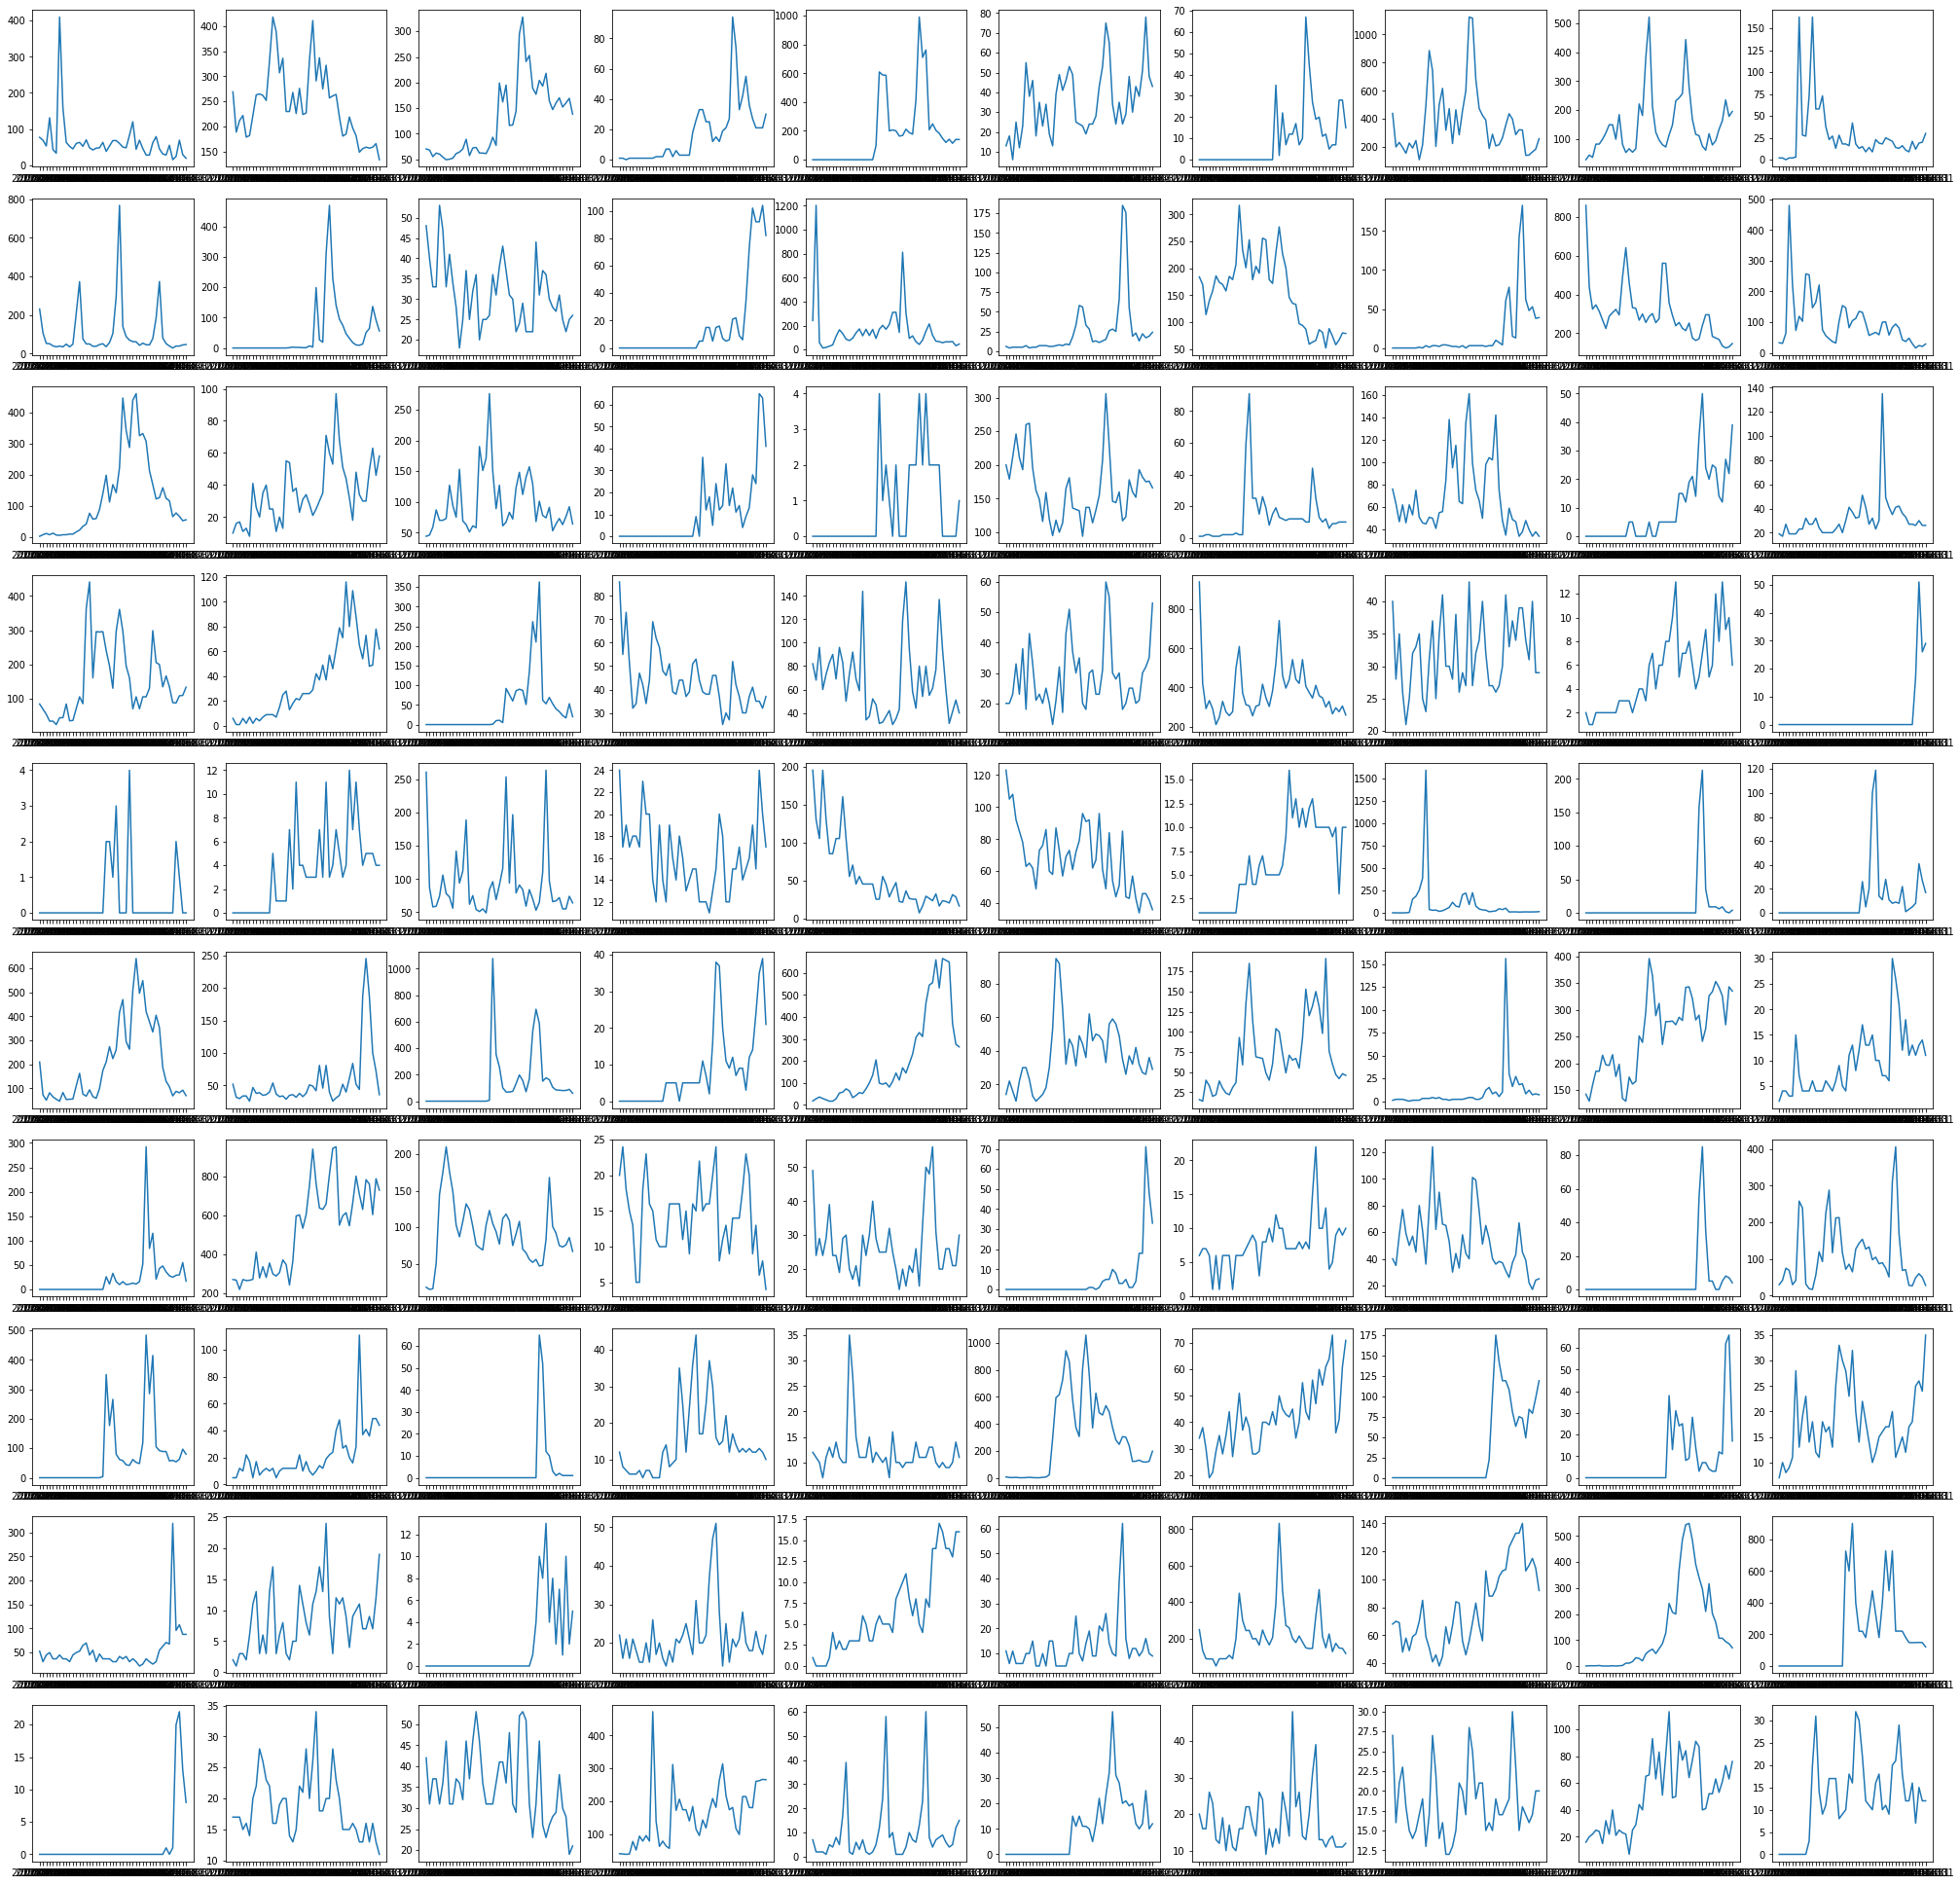

In [111]:
##plotting all the clusters
plt.figure(figsize=(35,35))
for i in range(0,100):
  plt.subplot(10,10,i+1)
  plt.plot(list(clusters_data_dict[i].keys()),list(clusters_data_dict[i].values()))


In [112]:
#checking  seasonality

In [121]:

# Invoke seasonal_decompose function

import itertools
import statsmodels.api as sm


def create_test_data(n):
  test_data=pd.DataFrame({"date":pd.to_datetime(list(date_sv_dict[n].keys())),"sv":list(date_sv_dict[n].values()),"index":[i for i in range(len(list(date_sv_dict[n].keys())))]})
  return test_data

def create_test_data_for_cluster(n):
  test_data=pd.DataFrame({"date":pd.to_datetime(list(clusters_data_dict[n].keys())),"sv":list(clusters_data_dict[n].values()),"index":[i for i in range(len(list(clusters_data_dict[n].keys())))]})
  return test_data


def check_seasonality(test_data):
  # data = pd.DataFrame({'date': pd.to_datetime(test_data.date), 'index' : test_data["index"], 'sv' : test_data['sv']})
  data=test_data
  data.set_index('date', inplace=True)
  # indexes = data['index'].unique()
  datai=data
  datai['log_y'] = np.log(datai['sv'])
  y_ds = datai['log_y'].resample('MS').mean()
  y_ds = y_ds.fillna(0)

  p = d = q = range(0, 2)
  pdq = list(itertools.product(p, d, q))
  seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

  cols = ['param','seasonal_param','AIC']
  lst = pd.DataFrame(columns=cols)
  for param in pdq:
      for param_seasonal in seasonal_pdq:
          try:
              mod = sm.tsa.statespace.SARIMAX(y_ds,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
              results = mod.fit()
              lst = lst.append({'param':param, 'seasonal_param':param_seasonal, 'AIC':results.aic},ignore_index=True)
          except:
              continue


  order_param = lst.param[lst.AIC == lst.AIC.min()]
  order_param = order_param.values[0]
  seasonal_order_param = lst.seasonal_param[lst.AIC == lst.AIC.min()]
  seasonal_order_param = seasonal_order_param.values[0]

  if seasonal_order_param == (0,0,0,12):
      pattern = 'NON SEASONAL'
  else:
      pattern = 'SEASONAL'

  return pattern



In [122]:
import scipy

def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    return float(slope)


def trend_value(nums: list):
    nums = scipy.signal.savgol_filter(nums, 5, 3)
    summed_nums = sum(nums)
    multiplied_data = 0
    summed_index = 0 
    squared_index = 0


    for index, num in enumerate(nums):
        index += 1
        multiplied_data += index * num
        summed_index += index
        squared_index += index**2

    numerator = (len(nums) * multiplied_data) - (summed_nums * summed_index)
    denominator = (len(nums) * squared_index) - summed_index**2
    if denominator != 0:
        return numerator/denominator
    else:
        return 0

In [ ]:
# s=time.time()
# test_data=create_test_data_for_cluster(1)
# try:

#   pattern=check_seasonality(test_data)
# except:
#   pattern="NON SEASONAL"

In [120]:
import warnings
warnings.filterwarnings('ignore')
##classifing the cluster
import time

cluster_categories={}

for cluster_no in tqdm(unique_clusters):
  test_data=create_test_data_for_cluster(cluster_no)
  try:
    pattern=check_seasonality(test_data)
  except:
    pattern="NON SEASONAL"
  if pattern=='SEASONAL':
    cluster_categories.update({cluster_no:"Seasonal"})
  else:
    value=trend_value(test_data["sv"].to_list())
    if value<=0.00001 and value >=-0.00001:
      cluster_categories.update({cluster_no:"Stable"})
    elif value>0.00001 and value <=1:
      cluster_categories.update({cluster_no:"Slowing Growth"})
    elif value>1 and value <=20:
      cluster_categories.update({cluster_no:"Steady Growth"})
    elif value>20:
      cluster_categories.update({cluster_no:"Accelerated Growth"})
    elif value<-0.00001 and value >-5:
      cluster_categories.update({cluster_no:"Steady Decreasing"})
    elif value<-5:
      cluster_categories.update({cluster_no:"Fast Decreasing"})



100%|██████████| 100/100 [04:05<00:00,  2.46s/it]


In [123]:
cluster_categories

{0: 'Seasonal',
 1: 'Steady Decreasing',
 2: 'Seasonal',
 3: 'Steady Growth',
 4: 'Steady Growth',
 5: 'Seasonal',
 6: 'Slowing Growth',
 7: 'Seasonal',
 8: 'Seasonal',
 9: 'Steady Decreasing',
 10: 'Seasonal',
 11: 'Steady Growth',
 12: 'Seasonal',
 13: 'Steady Growth',
 14: 'Seasonal',
 15: 'Seasonal',
 16: 'Steady Decreasing',
 17: 'Steady Growth',
 18: 'Seasonal',
 19: 'Seasonal',
 20: 'Seasonal',
 21: 'Seasonal',
 22: 'Seasonal',
 23: 'Slowing Growth',
 24: 'Slowing Growth',
 25: 'Seasonal',
 26: 'Seasonal',
 27: 'Seasonal',
 28: 'Slowing Growth',
 29: 'Seasonal',
 30: 'Seasonal',
 31: 'Seasonal',
 32: 'Steady Growth',
 33: 'Seasonal',
 34: 'Seasonal',
 35: 'Seasonal',
 36: 'Seasonal',
 37: 'Slowing Growth',
 38: 'Seasonal',
 39: 'Slowing Growth',
 40: 'Slowing Growth',
 41: 'Slowing Growth',
 42: 'Seasonal',
 43: 'Steady Decreasing',
 44: 'Seasonal',
 45: 'Steady Decreasing',
 46: 'Seasonal',
 47: 'Seasonal',
 48: 'Slowing Growth',
 49: 'Slowing Growth',
 50: 'Seasonal',
 51: 'Se

In [124]:
import pickle
pickle.dump(cluster_categories,open("/content/drive/MyDrive/clusters_categories.pickle","wb"))

In [126]:
import warnings
warnings.filterwarnings('ignore')
##classifing the cluster

entity_categories={}

for entity in tqdm(unique_entity):
  test_data=create_test_data(entity)
  try:
    pattern=check_seasonality(test_data)
  except:
    pattern="NON SEASONAL"
  if pattern=='SEASONAL':
    entity_categories.update({entity:"Seasonal"})
  else:
    value=trend_value(test_data["sv"].to_list())
    if value<=0.00001 and value >=-0.00001:
      entity_categories.update({entity:"Stable"})
    elif value>0.00001 and value <=1:
      entity_categories.update({entity:"Slowing Growth"})
    elif value>1 and value <=20:
      entity_categories.update({entity:"Steady Growth"})
    elif value>20:
      entity_categories.update({entity:"Accelerated Growth"})
    elif value<-0.00001 and value >-5:
      entity_categories.update({entity:"Steady Decreasing"})
    elif value<-5:
      entity_categories.update({entity:"Fast Decreasing"})



100%|██████████| 6324/6324 [2:56:45<00:00,  1.68s/it]


In [127]:
import pickle
pickle.dump(entity_categories,open("/content/drive/MyDrive/entity_categories.pickle","wb"))

In [128]:
entity=unique_entity
cluster=[cluster_dict[i] for i in entity]
cluster_cat=[cluster_categories[i] for i in cluster]
entity_cat=[entity_categories[i] for i in entity]

In [129]:
final_df=pd.DataFrame({"entity":entity,"cluster":cluster,"cluster_category":cluster_cat,"entity_categories":entity_cat})

In [130]:
final_df.head()

,entity,cluster,cluster_category,entity_categories
0,$1 lip gloss,2,Seasonal,Seasonal
1,02 night marine lip gloss,2,Seasonal,Slowing Growth
2,08 rose stream lip gloss,2,Seasonal,Steady Growth
3,1 dollar lip gloss,2,Seasonal,Seasonal
4,10ml lip gloss tubes,20,Seasonal,Steady Growth


In [131]:
final_df.to_csv("/content/drive/MyDrive/final.csv",index=None)

In [132]:
final_df.to_csv("final.csv",index=None)

In [133]:
final_df.shape

(6324, 4)

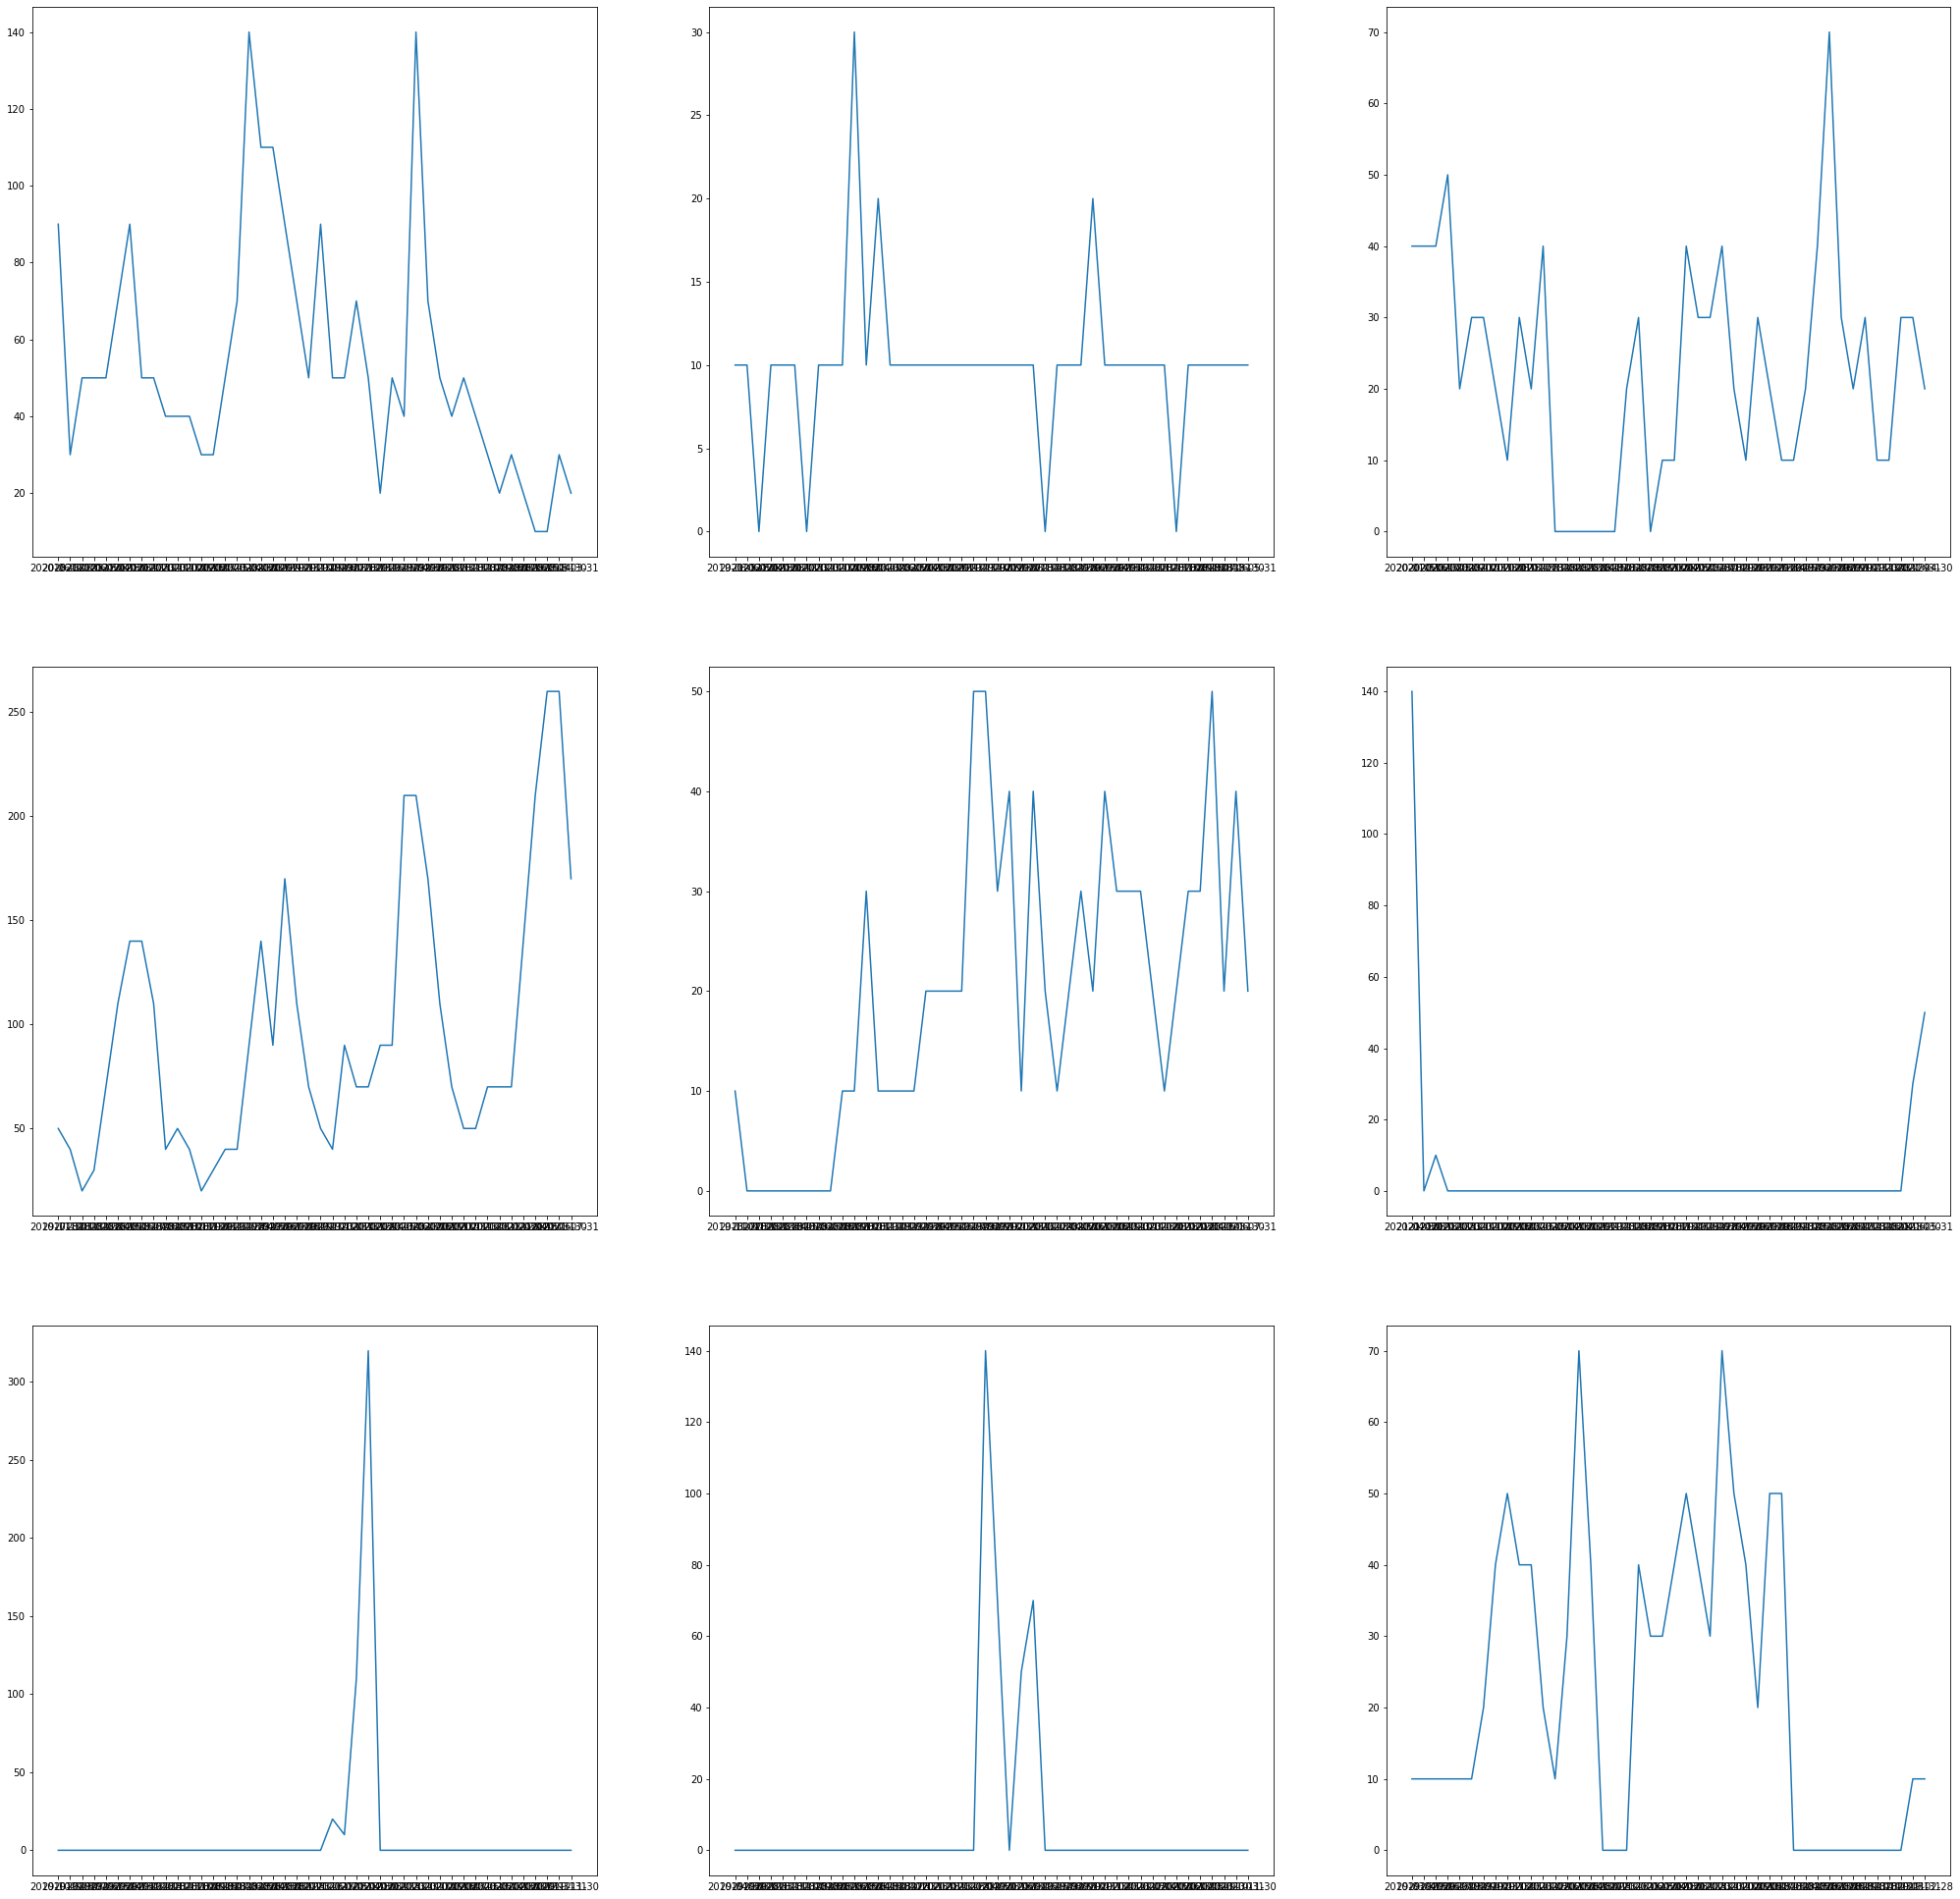

In [77]:
plt.figure(figsize=(35,35))
for i in range(len(a)):
  plt.subplot(3,3,i+1)
  plt.plot(list(date_sv_dict[a[i]].keys()),list(date_sv_dict[a[i]].values()))